In [1]:
# OPTIONAL: Load the "autoreload" eX_orig[alias]tension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
barcodes = pd.read_csv("artifacts/candidates_sgRNA_analysis.txt", sep="\t").set_index(["Gene", "Target", "Alias", "Barcode"])

In [4]:
candidates = pd.read_csv("artifacts/candidates.txt", sep=",", header=None)[0]
candidates

0      1110059E24Rik
1      2700062C07Rik
2      9030619P08Rik
3           AA792892
4               Aars
           ...      
756           Zfp959
757           Zmynd8
758            Zpld1
759             Zpr1
760           Zswim7
Name: 0, Length: 761, dtype: object

In [5]:
barcodes.loc["Ssbp1"]

Read Count  corr w/ other gRNAs  \
Target Alias Barcode                                    
T1     MB01  Ssbp1-1       367.0             0.364806   
             Ssbp1-2       598.0             0.216288   
             Ssbp1-3       804.0             0.306516   
             Ssbp1-4        50.0             0.372579   
             Ssbp1-5       137.0             0.418789   
       MB02  Ssbp1-1       289.0             0.294559   
             Ssbp1-2       563.0             0.114702   
             Ssbp1-3       555.0             0.250754   
             Ssbp1-4        21.0            -0.143402   
             Ssbp1-5       141.0             0.348261   
T2     MB03  Ssbp1-1       292.0             0.836705   
             Ssbp1-2       800.0             0.835568   
             Ssbp1-3       849.0             0.714640   
             Ssbp1-4        50.0             0.272193   
             Ssbp1-5       168.0             0.680619   
       MB04  Ssbp1-1       501.0             0.749298   
             Ssbp1-2      1036.0             0.617126   
             Ssbp1-3       952.0             0.711651   
             Ssbp1-4       136.0             0.639752   
             Ssbp1-5       124.0             0.591126   
T3     MB05  Ssbp1-1       417.0             0.751930   
             Ssbp1-2       755.0             0.737102   
             Ssbp1-3       708.0             0.696212   
             Ssbp1-4        47.0             0.785225   
             Ssbp1-5       123.0             0.790351   
       MB06  Ssbp1-1       530.0             0.923470   
             Ssbp1-2       680.0             0.882876   
             Ssbp1-3       684.0             0.881775   
             Ssbp1-4       101.0            -0.475493   
             Ssbp1-5       178.0             0.924571   

                      corr w/ other gRNAs in paired replicate  
Target Alias Barcode                                           
T1     MB01  Ssbp1-1                                 0.212430  
             Ssbp1-2                                 0.605826  
             Ssbp1-3                                 0.492785  
             Ssbp1-4                                 0.351961  
             Ssbp1-5                                 0.372572  
       MB02  Ssbp1-1                                 0.264001  
             Ssbp1-2                                 0.568884  
             Ssbp1-3                                 0.474743  
             Ssbp1-4                                -0.178479  
             Ssbp1-5                                 0.605826  
T2     MB03  Ssbp1-1                                 0.800739  
             Ssbp1-2                                 0.849705  
             Ssbp1-3                                 0.871227  
             Ssbp1-4                                 0.516496  
             Ssbp1-5                                 0.634125  
       MB04  Ssbp1-1                                 0.800739  
             Ssbp1-2                                 0.764749  
             Ssbp1-3                                 0.821213  
             Ssbp1-4                                 0.837816  
             Ssbp1-5                                 0.714564  
T3     MB05  Ssbp1-1                                 0.741712  
             Ssbp1-2                                 0.853272  
             Ssbp1-3                                 0.606572  
             Ssbp1-4                                 0.911371  
             Ssbp1-5                                 0.881168  
       MB06  Ssbp1-1                                 0.881533  
             Ssbp1-2                                 0.885699  
             Ssbp1-3                                 0.806273  
             Ssbp1-4                                -0.255612  
             Ssbp1-5                                 0.853272

In [6]:
b1 = barcodes.loc[barcodes.index.get_level_values(0).isin(candidates), :]

b1 = b1[b1["Read Count"] > 200]
b1 

Read Count  corr w/ other gRNAs  \
Gene          Target Alias Barcode                                            
1110059E24Rik T1     MB01  1110059E24Rik-1       865.0             0.434395   
                           1110059E24Rik-3       950.0             0.243685   
                           1110059E24Rik-4       350.0            -0.042067   
                           1110059E24Rik-5       223.0            -0.105666   
2700062C07Rik T1     MB01  2700062C07Rik-1       640.0             0.073740   
...                                                ...                  ...   
Zswim7        T3     MB06  Zswim7-1             1139.0             0.802442   
                           Zswim7-2             1313.0             0.887181   
                           Zswim7-3              366.0             0.766212   
                           Zswim7-4             2764.0             0.856109   
                           Zswim7-5             2402.0             0.838448   

                                            corr w/ other gRNAs in paired replicate  
Gene          Target Alias Barcode                                                   
1110059E24Rik T1     MB01  1110059E24Rik-1                                 0.339963  
                           1110059E24Rik-3                                 0.485264  
                           1110059E24Rik-4                                -0.018523  
                           1110059E24Rik-5                                -0.138104  
2700062C07Rik T1     MB01  2700062C07Rik-1                                 0.673961  
...                                                                             ...  
Zswim7        T3     MB06  Zswim7-1                                        0.893256  
                           Zswim7-2                                        0.919833  
                           Zswim7-3                                        0.685046  
                           Zswim7-4                                        0.949348  
                           Zswim7-5                                        0.902122  

[18585 rows x 3 columns]

In [7]:
b2 = b1[(b1["corr w/ other gRNAs"] > 0.6) | (b1["corr w/ other gRNAs"].isna())]
b2 

Read Count  corr w/ other gRNAs  \
Gene          Target Alias Barcode                                            
9030619P08Rik T1     MB01  9030619P08Rik-1       535.0                  NaN   
AA792892      T1     MB01  AA792892-3            716.0                  NaN   
Abcf1         T1     MB01  Abcf1-3               546.0             0.678005   
                           Abcf1-4               736.0             0.733408   
Abraxas1      T1     MB01  Abraxas1-1           1325.0             0.780171   
...                                                ...                  ...   
Zswim7        T3     MB06  Zswim7-1             1139.0             0.802442   
                           Zswim7-2             1313.0             0.887181   
                           Zswim7-3              366.0             0.766212   
                           Zswim7-4             2764.0             0.856109   
                           Zswim7-5             2402.0             0.838448   

                                            corr w/ other gRNAs in paired replicate  
Gene          Target Alias Barcode                                                   
9030619P08Rik T1     MB01  9030619P08Rik-1                                 0.729979  
AA792892      T1     MB01  AA792892-3                                      0.784632  
Abcf1         T1     MB01  Abcf1-3                                         0.343676  
                           Abcf1-4                                         0.668857  
Abraxas1      T1     MB01  Abraxas1-1                                      0.777997  
...                                                                             ...  
Zswim7        T3     MB06  Zswim7-1                                        0.893256  
                           Zswim7-2                                        0.919833  
                           Zswim7-3                                        0.685046  
                           Zswim7-4                                        0.949348  
                           Zswim7-5                                        0.902122  

[14428 rows x 3 columns]

In [8]:
b3 = b2[b2["corr w/ other gRNAs in paired replicate"] > 0.6]
b3

Read Count  corr w/ other gRNAs  \
Gene          Target Alias Barcode                                            
9030619P08Rik T1     MB01  9030619P08Rik-1       535.0                  NaN   
AA792892      T1     MB01  AA792892-3            716.0                  NaN   
Abcf1         T1     MB01  Abcf1-4               736.0             0.733408   
Abraxas1      T1     MB01  Abraxas1-1           1325.0             0.780171   
                           Abraxas1-3            256.0             0.767353   
...                                                ...                  ...   
Zswim7        T3     MB06  Zswim7-1             1139.0             0.802442   
                           Zswim7-2             1313.0             0.887181   
                           Zswim7-3              366.0             0.766212   
                           Zswim7-4             2764.0             0.856109   
                           Zswim7-5             2402.0             0.838448   

                                            corr w/ other gRNAs in paired replicate  
Gene          Target Alias Barcode                                                   
9030619P08Rik T1     MB01  9030619P08Rik-1                                 0.729979  
AA792892      T1     MB01  AA792892-3                                      0.784632  
Abcf1         T1     MB01  Abcf1-4                                         0.668857  
Abraxas1      T1     MB01  Abraxas1-1                                      0.777997  
                           Abraxas1-3                                      0.688725  
...                                                                             ...  
Zswim7        T3     MB06  Zswim7-1                                        0.893256  
                           Zswim7-2                                        0.919833  
                           Zswim7-3                                        0.685046  
                           Zswim7-4                                        0.949348  
                           Zswim7-5                                        0.902122  

[13482 rows x 3 columns]

In [9]:
passed_barcodes = b3.index.unique("Barcode").to_list()

<AxesSubplot: xlabel='#Barcodes', ylabel='count'>

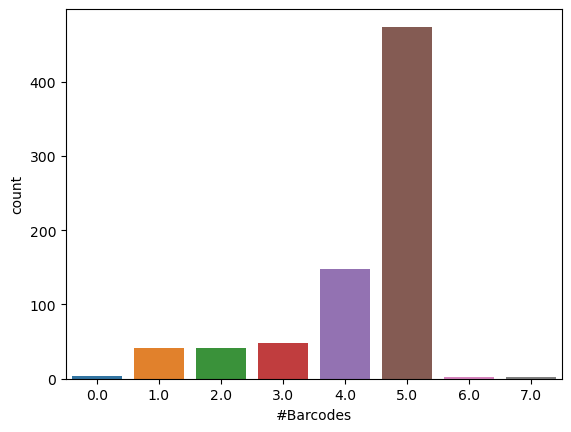

In [10]:
barcodes_per_gene = pd.Series([p.rpartition("-")[0] for p in passed_barcodes]).value_counts().rename("#Barcodes").to_frame()

for c in candidates:
    if c not in barcodes_per_gene.index:
        barcodes_per_gene.loc[c, barcodes_per_gene.columns[0]] = 0

sns.countplot(data=barcodes_per_gene, x="#Barcodes")

In [11]:
barcodes_per_gene.value_counts().sort_index()

#Barcodes
0.0            3
1.0           42
2.0           42
3.0           48
4.0          148
5.0          474
6.0            2
7.0            2
dtype: int64

In [12]:
(barcodes_per_gene >= 3).sum()

#Barcodes    674
dtype: int64

In [13]:
barcodes_per_gene[barcodes_per_gene["#Barcodes"] == 0]

,#Barcodes
Brcc3dc,0.0
Fance,0.0
Nhej1,0.0


In [14]:
barcode_list = barcodes.reset_index()[["Gene", "Barcode"]]
barcode_list = barcode_list[barcode_list["Barcode"].isin(passed_barcodes)].drop_duplicates()
barcode_list = barcode_list.groupby(by='Gene').head(3).sort_values(by='Gene')
barcode_list["Notes"] = ""

In [15]:
barcode_list["Gene"].value_counts().value_counts()

3    674
2     42
1     42
Name: Gene, dtype: int64

In [16]:
low_count_barcodes = barcodes.loc[np.intersect1d(barcodes.index.get_level_values("Gene"), candidates)]
low_count_barcodes = low_count_barcodes[low_count_barcodes["Read Count"] < 200]
low_count_barcodes = low_count_barcodes.reset_index()[["Gene", "Barcode"]].drop_duplicates()
low_count_barcodes = low_count_barcodes[~low_count_barcodes["Barcode"].isin(barcode_list["Barcode"])]
low_count_barcodes["Notes"] = "Low count in original screen"

In [17]:
low_count_barcodes.shape

(355, 3)

In [18]:
no_barcodes = pd.DataFrame([("Nhej1", "", "Barcode Missing"),
               ("Fance", "", "Barcode Missing"),
               ("Brcc3dc", "", "Barcode Missing")], columns=barcode_list.columns)

In [19]:
pd.concat([barcode_list, low_count_barcodes]).groupby(by='Gene').head(3).sort_values(by='Gene')["Gene"].value_counts().value_counts()

3    687
1     39
2     32
Name: Gene, dtype: int64

In [42]:
gene_barcode_counts = pd.concat([barcode_list, low_count_barcodes]).groupby(by='Gene').head(3).sort_values(by='Gene')["Gene"].value_counts()
genes_w_1 = gene_barcode_counts[gene_barcode_counts == 1]
genes_w_2 = gene_barcode_counts[gene_barcode_counts == 2]

In [80]:
failed_barcodes = barcodes.loc[~barcodes.index.get_level_values("Barcode").isin(pd.concat([barcode_list, low_count_barcodes])["Barcode"]), :].reset_index().set_index("Gene")["Barcode"]
failed_barcodes

Gene
0610009B22Rik    0610009B22Rik-1
0610009B22Rik    0610009B22Rik-2
0610009B22Rik    0610009B22Rik-3
0610009B22Rik    0610009B22Rik-4
0610009B22Rik    0610009B22Rik-5
                      ...       
mei-04                    Mei4-1
mei-04                    Mei4-2
mei-04                    Mei4-3
mei-04                    Mei4-4
mei-04                    Mei4-5
Name: Barcode, Length: 521797, dtype: object

In [86]:
genes_w_2

Rps19        2
Vmn1r55      2
Oas1g        2
Zfp935       2
Vmn2r97      2
Gm20604      2
Gm11563      2
Sem1         2
Rpl35a       2
Rpl35        2
Gapdh        2
Eif1         2
Pin4         2
Cyp2c68      2
H2al1o       2
Smarce1      2
Defa40       2
Hnrnpa1      2
Lce1d        2
Krtap6-5     2
Hmgb3        2
Ube2v2       2
Krtap19-1    2
Tomm7        2
Lce1l        2
Ppp4r2       2
Ifnab        2
Tnp1         2
Klrc3        2
Cyp3a11      2
Vmn1r124     2
H3c8         2
Name: Gene, dtype: int64

In [81]:
for g in genes_w_1.index:
    if g not in failed_barcodes.index:
        if (barcodes.loc[g].index.get_level_values("Barcode").unique().shape[0] == 1):
            continue
        else:
            print("more than 1 exists")
            continue
    print(failed_barcodes.loc[g].unique()[:2])

In [83]:
for g in genes_w_2.index:
    if g not in failed_barcodes.index:
        if (barcodes.loc[g].index.get_level_values("Barcode").unique().shape[0] == 2):
            print("only 2 exists")
            continue
        else:
            print("more than 2 exists")
            continue
    print(failed_barcodes.loc[g].unique()[:2])

only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists
only 2 exists


In [20]:
final_barcode_list = pd.concat([barcode_list, low_count_barcodes, no_barcodes]).groupby(by='Gene').head(3).sort_values(by='Gene')
final_barcode_list

,Gene,Barcode,Notes
44,1110059E24Rik,1110059E24Rik-1,
46,1110059E24Rik,1110059E24Rik-3,
47,1110059E24Rik,1110059E24Rik-4,
698,2700062C07Rik,2700062C07Rik-1,
700,2700062C07Rik,2700062C07Rik-3,
...,...,...,...
89223,Zpr1,Zpr1-2,
89224,Zpr1,Zpr1-3,
89335,Zswim7,Zswim7-2,
89334,Zswim7,Zswim7-1,


In [21]:
final_barcode_list["Gene"].value_counts().value_counts().sort_index()

1     42
2     32
3    687
Name: Gene, dtype: int64

In [22]:
final_barcode_list["Gene"].nunique()

761

In [23]:
final_barcode_list.to_csv("artifacts/barcode_selection_for_validation_experiments_{}.csv".format(final_barcode_list["Gene"].nunique()), index=False)

In [24]:
final_barcode_list.shape[0]

2167